In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from functions import *

## Load Dataset

In [3]:
df = pd.read_csv('Dstillery_dataset.txt',sep='\t')

In [4]:
df.reset_index(drop=True, inplace = True)

In [5]:
df.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,NaN,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,NaN,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,NaN,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,NaN,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Exploring the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbuyer              54584 non-null  int64  
 1   buy_freq             2327 non-null   float64
 2   visit_freq           54584 non-null  int64  
 3   buy_interval         54584 non-null  float64
 4   sv_interval          54584 non-null  float64
 5   expected_time_buy    54584 non-null  float64
 6   expected_time_visit  54584 non-null  float64
 7   last_buy             54584 non-null  int64  
 8   last_visit           54584 non-null  int64  
 9   multiple_buy         54584 non-null  int64  
 10  multiple_visit       54584 non-null  int64  
 11  uniq_urls            54584 non-null  int64  
 12  num_checkins         54584 non-null  int64  
 13  y_buy                54584 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.8 MB


In [6]:
df.describe()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54584.000000,2327.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000
mean,0.042632,1.240653,1.852777,0.210008,5.825610,-0.198040,-10.210786,64.729335,64.729335,0.006357,0.277444,86.569343,720.657592,0.004635
std,0.202027,0.782228,2.921820,3.922016,17.595442,4.997792,31.879722,53.476658,53.476658,0.079479,0.447742,61.969765,1275.727306,0.067924
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.104167,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,802.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


In [7]:
# deploy a function that return value_counts for all the attributes
value__counts(df)

0    52257
1     2327
Name: isbuyer, dtype: int64
1.0     1980
2.0      244
3.0       55
4.0       20
5.0       17
6.0        5
7.0        2
11.0       2
15.0       1
8.0        1
Name: buy_freq, dtype: int64
1     39358
2      7697
3      2879
4      1358
5       810
      ...  
65        1
50        1
43        1
84        1
60        1
Name: visit_freq, Length: 64, dtype: int64
0.000000      54237
0.041667         17
0.083333          3
0.125000          3
3.041667          3
              ...  
170.833300        1
7.583333          1
31.583330         1
20.638890         1
9.958333          1
Name: buy_interval, Length: 295, dtype: int64
0.000000      39440
0.041667       1319
0.083333        145
0.125000        107
1.000000         67
              ...  
1.627451          1
92.750000         1
3.937500          1
140.000000        1
12.822920         1
Name: sv_interval, Length: 5886, dtype: int64
 0.000000      54237
-133.628200        1
-27.771500         1
 80.404080         1


### After exploring the db I discover:
- is_buyer is a binary variable 0 new buyer, 1 buy the product
- buy_freq has many null values
- last_buy and last_visit contains very similar information.
- uniq_urls the min value is -1, this can be a placeholder becuase you can not be a negative number.
- Target value is imbalance, It needs to be balance before implemening the models.

## Checking for null values in the df

In [6]:
df.isnull().sum() 
# buy_freq feature has a hight amount of null values

isbuyer                    0
buy_freq               52257
visit_freq                 0
buy_interval               0
sv_interval                0
expected_time_buy          0
expected_time_visit        0
last_buy                   0
last_visit                 0
multiple_buy               0
multiple_visit             0
uniq_urls                  0
num_checkins               0
y_buy                      0
dtype: int64

## Drop buy_freq feature 


- I'm not going to include the attribute buy_freq in my future analysis becuase of the higer percentage of null values. If the percentage of the values was't too hight I could replace the values by the mediam, but its not the case.

In [7]:
df.drop(['buy_freq'], axis=1, inplace = True)


In [8]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Checking for duplicates values

In [9]:
# removing duplicates 
duplicates = df[df.duplicated(keep = False)]
len(duplicates)


516

## Removing duplicates values

In [10]:
df.drop_duplicates(keep=False,inplace = True)
len(df)

54068

## Multicollinearity of features

In [11]:
df.corr()[abs(df.corr()>.85)]


,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
isbuyer,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_freq,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy_interval,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sv_interval,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_buy,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_visit,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_buy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
last_visit,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
multiple_buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
multiple_visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


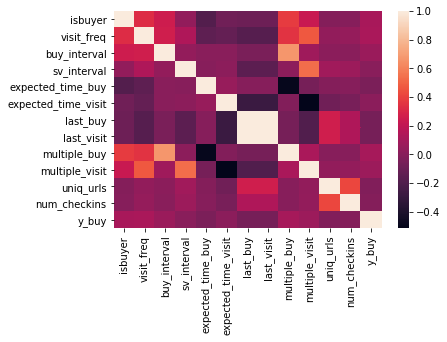

In [12]:
corr_matrix=df.corr()
ax = sns.heatmap(corr_matrix)

- Higher correleted featrures are last_buy and last_visit, the need to be remove from the df becuase both features contain the same information.


In [13]:
df.drop(['last_buy','last_visit'], axis=1, inplace = True)


In [14]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,0,0,154,1100,0
3,0,1,0.0,0.0,0.0,0.0000,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,0,1,103,362,0
5,0,1,0.0,0.0,0.0,0.0000,0,0,17,35,0


## Replace negative values in uniq_urls feature with the median

In [15]:
df[df['uniq_urls']== -1] # checking for -1 values

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
23,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,26,0
50,0,2,0.0,0.375000,0.0,-1.345821,0,1,-1,359,0
72,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,99,0
118,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,364,0
158,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,414,0
...,...,...,...,...,...,...,...,...,...,...,...
54327,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,343,0
54409,0,2,0.0,0.041667,0.0,-73.160350,0,1,-1,20,0
54437,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,391,0
54497,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,1297,0


In [16]:
df['uniq_urls'] = df['uniq_urls'].replace(-1, np.nan) # replace
df['uniq_urls'] = df['uniq_urls'].fillna(df['uniq_urls'].median())

<IPython.core.display.Javascript object>

In [17]:
df.describe()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000
mean,0.043038,1.860916,0.212012,5.881207,-0.199930,-10.308233,0.006418,0.280092,88.340349,726.785455,0.004679
std,0.202945,2.934536,3.940633,17.669956,5.021547,32.015802,0.079855,0.449048,60.947754,1279.911461,0.068246
min,0.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,130.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,324.000000,0.000000
75%,0.000000,2.000000,0.000000,0.166667,0.000000,0.000000,0.000000,1.000000,155.000000,809.000000,0.000000
max,1.000000,84.000000,174.625000,184.916700,84.285710,91.401920,1.000000,1.000000,206.000000,37091.000000,1.000000


## Exploratory Data Analysis

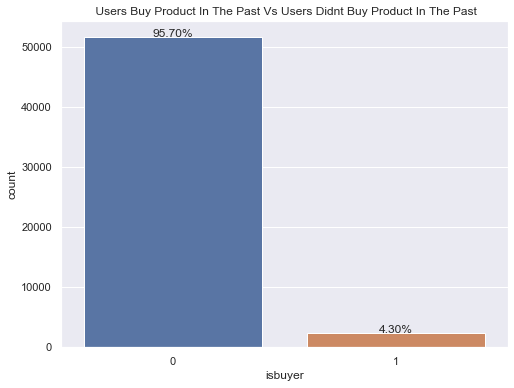

In [20]:
count_freq_plot(df,"isbuyer", "buyer", " Users Buy Product In The Past Vs Users Didnt Buy Product In The Past",True)

- The mayority of the users didnt buy the product in the past. They are new buyers.

Text(0.5, 0, 'Avg of visit_freq')

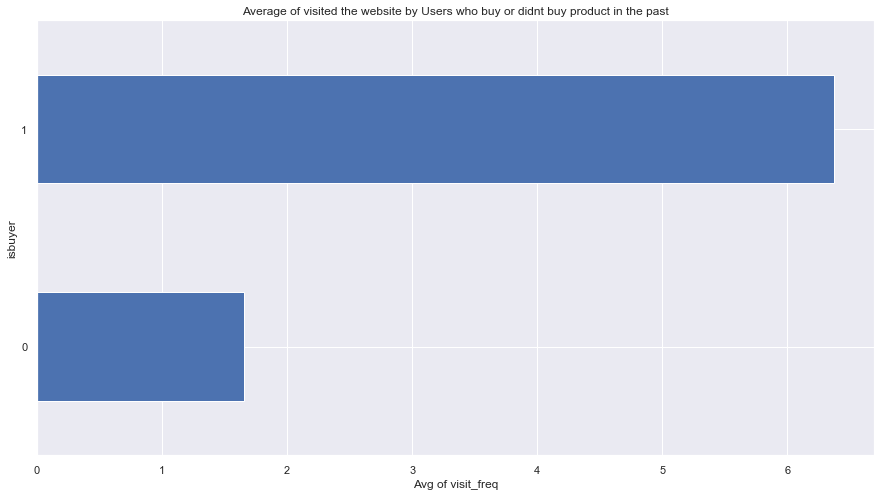

In [21]:
df.groupby(['isbuyer'])['visit_freq'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visited the website by Users who buy or didnt buy product in the past')
plt.xlabel("Avg of visit_freq")


# New Buyers havent visit the website in the past.

# buyers that purchaser the product in the past visit the website more often than users who didnt buy the product in the past

- Buyers that purchaser the product in the past visit the website more often

Text(0.5, 0, '# of visit_freq')

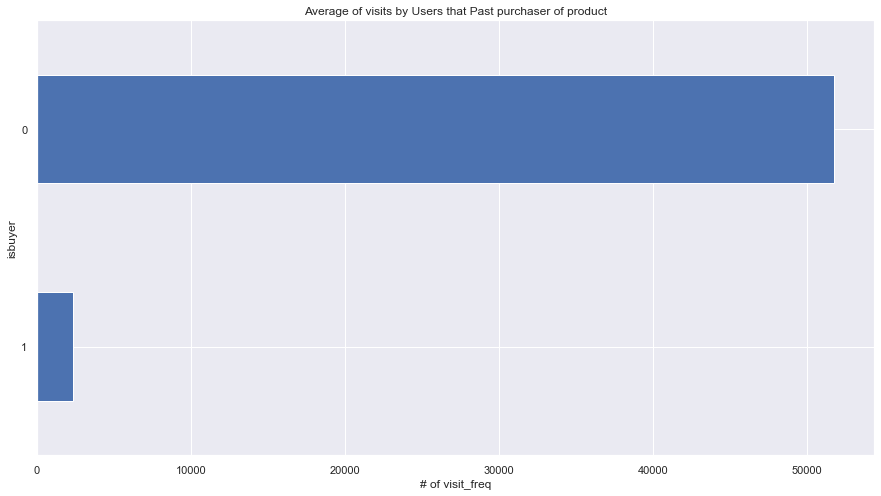

In [22]:
df.groupby(['isbuyer'])['sv_interval'].count().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visits by Users that Past purchaser of product')
plt.xlabel("# of visit_freq")

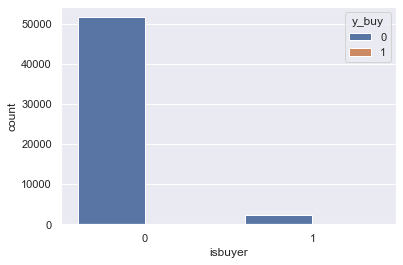

In [24]:
sns.countplot(x = 'isbuyer', hue = 'y_buy', data = df)

In [18]:
df.groupby(['isbuyer'])['last_buy'].mean()

isbuyer
0    65.741317
1    42.003438
Name: last_buy, dtype: float64

## Normalized df

In [13]:
normalizad_features(df)

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.820388,0.057401,0.0
1,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.747573,0.029631,0.0
3,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.728155,0.014505,0.0
4,0.0,0.023810,0.0,0.002704,0.683386,0.309896,0.0,1.0,0.500000,0.009733,0.0
5,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.082524,0.000917,0.0


## Target Feature

- Binary feature: buy the product and not buy the product


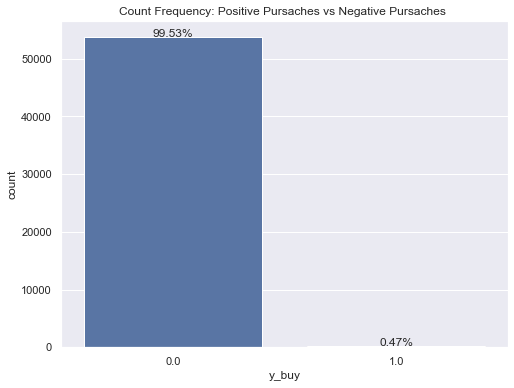

In [16]:
count_freq_plot(df,"y_buy", 'Pursaches', True)

- 99,53% of users didnt buy the product, only 0.47% of users buy the product. The target value is imbalance, it has 
higher % of user that didnt buy the products. 

## Defining independent and dependent variables


In [14]:
x = df.loc[:,['isbuyer', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'multiple_buy',
       'multiple_visit', 'uniq_urls', 'num_checkins']]
           
           
y = df.loc[:,'y_buy'] # target value

## Train-Test Split for imbalance df

In [20]:
X_train, y_train, X_test, y_test, X_val, y_val = split(x,y)[0], split(x,y)[1], split(x,y)[2], split(x,y)[3],split(x,y)[4], split(x,y)[5]

## LG Modeling for imbalance df

In [21]:
model, prediction = classifier_modeling(LogisticRegression(), X_train, y_train, X_val)

Accuracy: 99.45 %
Precision_weighted:  98.91 %
Recall_weighted:  99.45 %
fscore_weightted:  99.18 %
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     10755
         1.0       0.00      0.00      0.00        59

    accuracy                           0.99     10814
   macro avg       0.50      0.50      0.50     10814
weighted avg       0.99      0.99      0.99     10814



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classificat

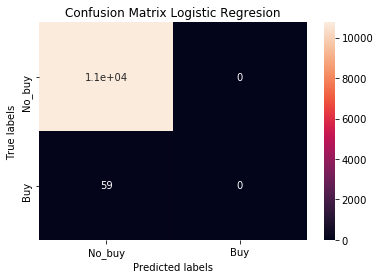

In [22]:
metrix_classifier(y_val, prediction)
confusion_m(y_val,prediction, 'Logistic Regresion')

- This model only predict negative values, user how dont buy the products.The accuracy metric will be missleading becuase the model does not detect any class 1. If we look to the precision and recall values 
we can see that this model didnt predict any class 1. Solution: increase the number of class 1 records in the df.

## Oversampling the minority of the classes

In [15]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x, y)


## Train-Test Split for balance df

In [16]:
X_train, y_train, X_test, y_test, X_val, y_val = split(X_over,y_over)[0], split(X_over,y_over)[1], split(X_over,y_over)[2], split(X_over,y_over)[3],split(X_over,y_over)[4], split(X_over,y_over)[5]

## LG Modeling for balance df

In [24]:
model, prediction = classifier_modeling(LogisticRegression(), X_train, y_train, X_val)

Accuracy: 78.01 %
Precision_weighted:  78.28 %
Recall_weighted:  78.01 %
fscore_weightted:  77.94 %
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79     10833
         1.0       0.81      0.73      0.77     10693

    accuracy                           0.78     21526
   macro avg       0.78      0.78      0.78     21526
weighted avg       0.78      0.78      0.78     21526



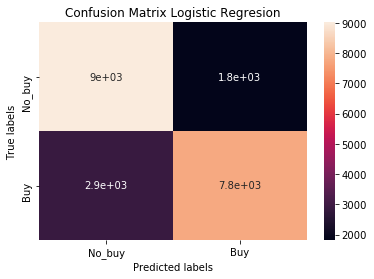

In [25]:
metrix_classifier(y_val, prediction)
confusion_m(y_val,prediction, 'Logistic Regresion')

- After oversampling the minority of the classes, the accuracy of the model decreased, but precision and recall scores are higher for class 1.

## Tuning hyperparameters using GridSearchCV and Crossvalidation

In [26]:
param_grid_1 = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}


In [29]:
val_preds = tune_parameters_clf( model, 4,X_train, y_train, X_val,param_grid_1)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_se

Grid Search found the following optimal parameters: 
C: 1
penalty: 'l2'


In [30]:
metrix_classifier(y_val, val_preds)

Accuracy: 78.01 %
Precision_weighted:  78.28 %
Recall_weighted:  78.01 %
fscore_weightted:  77.94 %
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79     10833
         1.0       0.81      0.73      0.77     10693

    accuracy                           0.78     21526
   macro avg       0.78      0.78      0.78     21526
weighted avg       0.78      0.78      0.78     21526



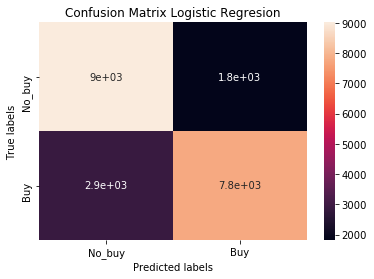

In [31]:
confusion_m(y_val,val_preds, 'Logistic Regresion')

## Final LG model

In [17]:
model_final, prediction_test = classifier_modeling(LogisticRegression(C=1,penalty ='l2'), X_train, y_train, X_test)

In [18]:
metrix_classifier(y_test, prediction_test)

Accuracy: 78.44 %
Precision_weighted:  78.78 %
Recall_weighted:  78.44 %
fscore_weightted:  78.38 %
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     10778
         1.0       0.82      0.73      0.77     10748

    accuracy                           0.78     21526
   macro avg       0.79      0.78      0.78     21526
weighted avg       0.79      0.78      0.78     21526



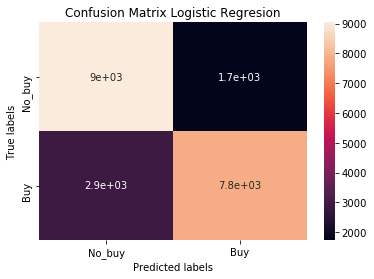

In [19]:
confusion_m(y_test,prediction_test, 'Logistic Regresion')

# AUC

In [20]:
from sklearn.metrics import roc_curve, auc


AUC: 0.7843708061390958


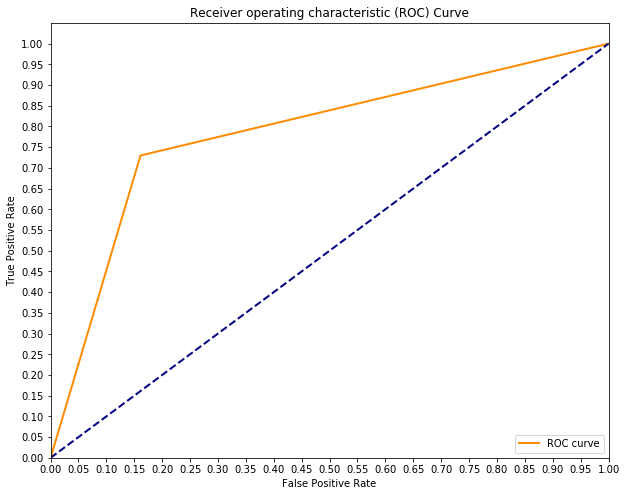

In [21]:
auc_plot(y_test, prediction_test)

## Finding the most important attributes for this model

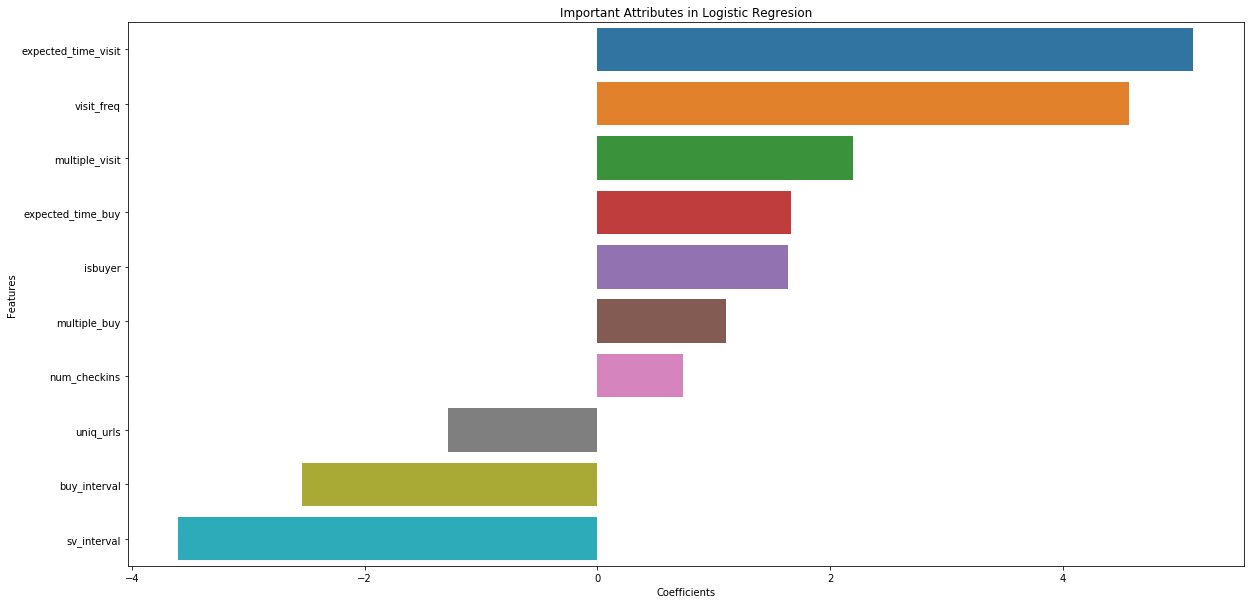

In [34]:
ploting_coefficients(model_final.coef_[0] , x.columns, 'Logistic Regresion')

## XGBoox Modeling for balance df

In [26]:
model_xgb, prediction_xgb = classifier_modeling(xgb.XGBClassifier(), X_train, y_train, X_val)

Accuracy: 84.76 %
Precision_weighted:  85.09 %
Recall_weighted:  84.76 %
fscore_weightted:  84.72 %
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86     10833
         1.0       0.88      0.80      0.84     10693

    accuracy                           0.85     21526
   macro avg       0.85      0.85      0.85     21526
weighted avg       0.85      0.85      0.85     21526



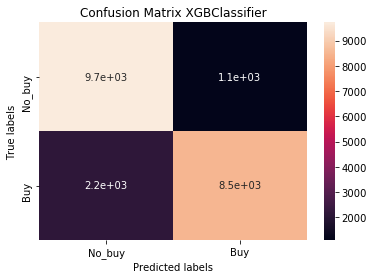

In [27]:
metrix_classifier(y_val, prediction_xgb)
confusion_m(y_val,prediction_xgb, 'XGBClassifier')

- After oversampling the minority of the classes, the accuracy of the model decreased, but precision and recall scores are higher for class 1.

## Tuning hyperparameters using GridSearchCV and Crossvalidation

In [42]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7]
}

In [43]:
val_preds = tune_parameters_clf( model_xgb, 4, X_train, y_train, X_val, param_grid_xgb)

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
subsample: 0.7


In [44]:
metrix_classifier(y_val, val_preds)

Accuracy: 98.57 %
Precision_weighted:  98.61 %
Recall_weighted:  98.57 %
fscore_weightted:  98.57 %
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     10833
         1.0       0.97      1.00      0.99     10693

    accuracy                           0.99     21526
   macro avg       0.99      0.99      0.99     21526
weighted avg       0.99      0.99      0.99     21526



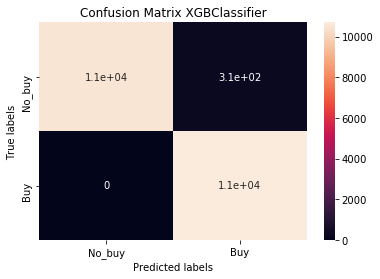

In [45]:
confusion_m(y_val,val_preds, 'XGBClassifier')

## Final LG model

In [28]:
model_final, prediction_test = classifier_modeling(xgb.XGBClassifier(learning_rate=0.2,
max_depth= 6,
min_child_weight=1,
subsample= 0.7), X_train, y_train, X_test)

In [29]:
metrix_classifier(y_test, prediction_test)

Accuracy: 98.45 %
Precision_weighted:  98.5 %
Recall_weighted:  98.45 %
fscore_weightted:  98.45 %
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     10778
         1.0       0.97      1.00      0.98     10748

    accuracy                           0.98     21526
   macro avg       0.98      0.98      0.98     21526
weighted avg       0.98      0.98      0.98     21526



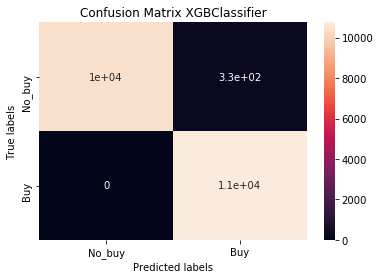

In [30]:
confusion_m(y_test,prediction_test, 'XGBClassifier')

# AUC

AUC: 0.9845518649100018


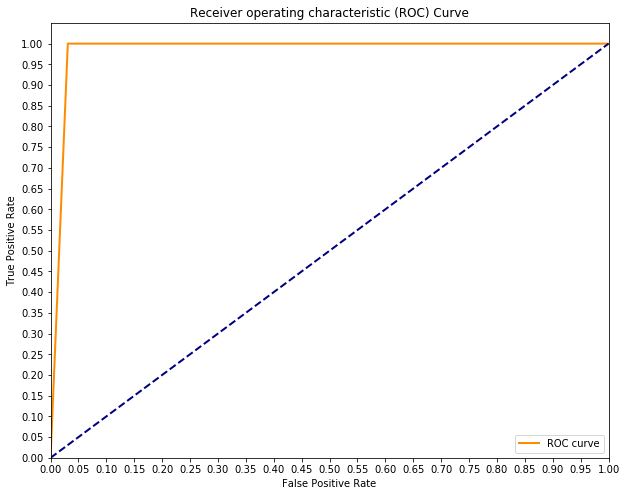

In [31]:
auc_plot(y_test, prediction_test)

## Finding the most important attributes for this model

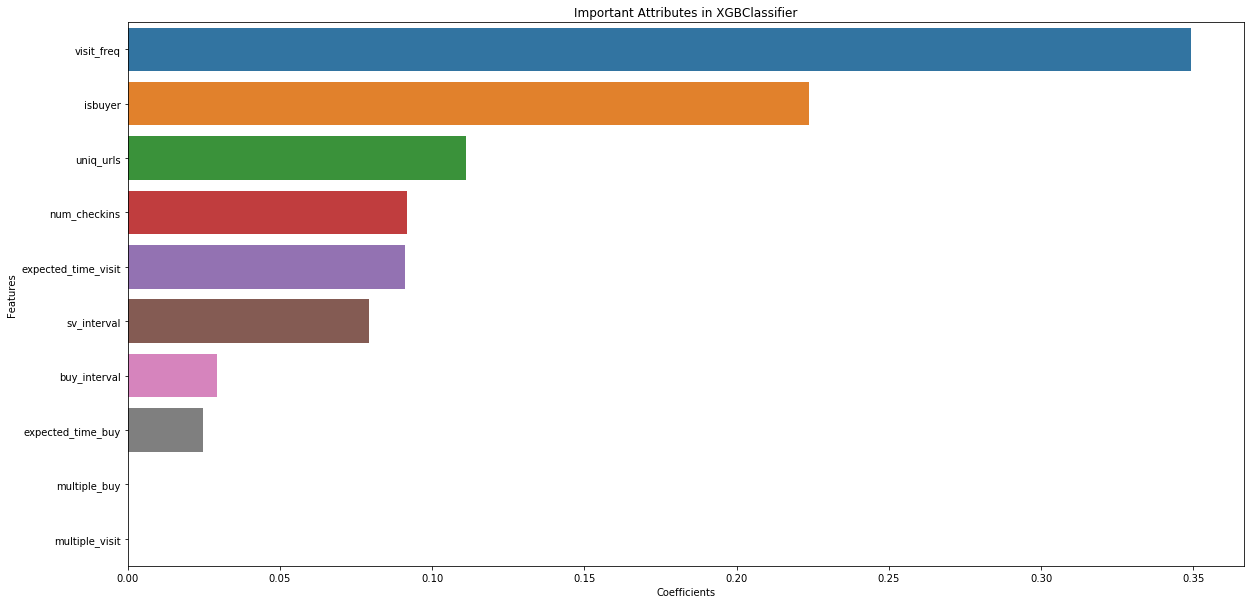

In [32]:
ploting_coefficients(model_final.feature_importances_ , x.columns, 'XGBClassifier')

In [46]:
    param_grid_1 = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}


In [26]:
logreg2 = LogisticRegression(C=1, penalty= 'l2')
model_log2 = logreg2.fit(X_train, y_train)
y_pred_c2 = logreg2.predict(X_test)


In [27]:
metrix_classifier(y_test, y_pred_c2)

Accuracy: 78.71 %
Precision_weighted:  79.01 %
Recall_weighted:  78.71 %
fscore_weightted:  78.65 %
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     10778
         1.0       0.82      0.74      0.78     10748

    accuracy                           0.79     21526
   macro avg       0.79      0.79      0.79     21526
weighted avg       0.79      0.79      0.79     21526



In [28]:
cdf2 = pd.DataFrame(model_log2.coef_[0], x.columns, columns=['Coefficients'])


In [29]:
cdf2['Coefficients'].sort_values(ascending = False)

expected_time_visit    5.101186
visit_freq             4.571907
multiple_visit         2.190343
isbuyer                1.639727
expected_time_buy      1.493380
multiple_buy           1.047102
num_checkins           0.530204
uniq_urls             -1.320086
buy_interval          -2.279717
sv_interval           -3.528049
Name: Coefficients, dtype: float64

In [105]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 85.83%
Validation accuracy: 85.91%


In [ ]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline

sklearn.__version__

<IPython.core.display.Javascript object>

'0.22.1'

In [16]:
X_train, X_test, y_train, y_test = train_test_split( x , y, test_size=0.2, random_state=1)


In [17]:
 # Creating an scaler object
std_slc = StandardScaler()
# sm = SMOTE()
    # Creating a pca object
oversample =  RandomOverSampler()
    # Creating a logistic regression object
logistic_Reg = LogisticRegression()
xgclassi = XGBClassifier()

In [22]:
from imblearn.pipeline import Pipeline
model = Pipeline([('std_slc', std_slc),
        ('sampling', oversample),
        ('clf', xgclass )])

# pipe1=make_pipeline(std_slc, oversample,c)



In [23]:
param_grid_1 = {'clf__penalty': ['l1', 'l2'],'clf__C':[0.001,.009,0.01,.09,1,5,10,25]}

param_grid_1 = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7]
})
grid_clf = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))



Grid Search found the following optimal parameters: 
clf__learning_rate: 0.2
clf__max_depth: 6
clf__min_child_weight: 1
clf__subsample: 0.7


In [24]:
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 98.09%
Validation accuracy: 97.53%


In [25]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10766
           1       0.02      0.10      0.04        48

    accuracy                           0.98     10814
   macro avg       0.51      0.54      0.51     10814
weighted avg       0.99      0.98      0.98     10814



In [38]:
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 85.71%
Validation accuracy: 86.16%


In [39]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     10766
           1       0.02      0.69      0.04        48

    accuracy                           0.86     10814
   macro avg       0.51      0.77      0.48     10814
weighted avg       0.99      0.86      0.92     10814



In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_over , y_over, test_size=0.2, random_state=1)


In [1]:
len(y_over)

NameError: name 'y_over' is not defined